In [1]:
#import libraries
import pandas as pd
print('pandas: %s' % pd.__version__)

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 150)

import numpy as np
print('geopandas: %s' % np.__version__)

# Tensorflow / Keras
import tensorflow as tf # used to access argmax function
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

import decimal
from decimal import Decimal

import keras 
import tensorflow as tf
from tensorflow.keras.layers import Dropout,BatchNormalization,Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from keras import callbacks
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense # for creating regular densely-connected NN layer.
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout,MaxPooling2D # for adding Concolutional and densely-connected NN layers.
from tensorflow.keras import layers

from pathlib import Path  

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding labels
from keras.models import load_model
from sklearn.preprocessing import StandardScaler



pandas: 1.5.0
geopandas: 1.23.2
Tensorflow/Keras: 2.10.0
pandas: 1.5.0
numpy: 1.23.2


In [2]:
model = load_model("/Users/paolo/Documents/TC_old/data/model_1l_512n_relu_dropout_std.h5")
test = pd.read_csv('/Users/paolo/Documents/TC/data/test_real_tom_target.csv').drop(columns=['Unnamed: 0'])
train = pd.read_csv('/Users/paolo/Documents/TC/data/training_real_tom_target.csv').drop(columns=['Unnamed: 0'])
val = pd.read_csv('/Users/paolo/Documents/TC/data/validation_real_tom_target.csv').drop(columns=['Unnamed: 0'])

Metal device set to: Apple M1


2023-01-17 09:24:49.283984: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-17 09:24:49.284284: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
test

,time,latitude,longitude,vo,r,u_200,u_850,v_200,v_850,ttr,sst,lsm,Real_tom_lsm
0,2016-01-01,0.0,20.0,0.000011,80.796135,-2.052292,0.008678,4.996910,-1.678764,-272.04962,0.00000,0.0,0.0
1,2016-01-01,0.0,22.5,0.000011,77.748420,-4.445312,0.740505,7.517281,0.792618,-250.63333,0.00000,0.0,0.0
2,2016-01-01,0.0,25.0,-0.000001,71.178825,-3.778427,1.056324,9.333221,0.688252,-229.52519,0.00000,0.0,0.0
3,2016-01-01,0.0,27.5,-0.000005,73.585754,-4.695709,1.236446,9.589882,0.555519,-240.80815,0.00000,0.0,0.0
4,2016-01-01,0.0,30.0,-0.000016,72.382780,-4.002563,0.734211,5.410950,-1.086350,-262.45557,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
539482,2019-12-01,-30.0,80.0,0.000006,2.637233,33.277840,5.379345,-0.286896,5.558327,-277.60870,294.14987,0.0,0.0
539483,2019-12-01,-30.0,82.5,-0.000020,23.660923,34.272537,6.438683,-13.026535,2.857349,-270.80573,294.23798,0.0,0.0
539484,2019-12-01,-30.0,85.0,-0.000019,46.051540,35.755882,7.248966,-18.870102,-3.349407,-249.43092,294.26890,0.0,0.0
539485,2019-12-01,-30.0,87.5,-0.000014,55.855648,34.069664,6.349327,-18.801796,-8.172478,-239.36870,294.36630,0.0,0.0


# Standardization

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_to_std = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']
train_std,val_std,test_std = train,val,test

# apply standardization on numerical features
train_std[cols_to_std] = scaler.fit_transform(train[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']])
val_std[cols_to_std] = scaler.transform(val[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']])
test_std[cols_to_std] = scaler.transform(test[[ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']])


# Image extraction

In [5]:
def extract_images(df, variables, verbose=False):
    number_of_img, rows, cols = len(df.time.unique()), len(df.latitude.unique()), len(df.longitude.unique())
    images = np.zeros( (number_of_img, rows, cols, len(variables)) )
    
    df = df.sort_values(by=['time','latitude','longitude'])
    k=0
    
    for day in range(0,number_of_img):
        
        a=df.iloc[377*day:377*(day+1)]
        i=0
        for var in variables:
            images[day,:,:,i] = a.pivot(index='latitude', columns='longitude')[var]
            i+=1
        k+=1
        if (k%100==0) & (verbose==True): print(k)
    return images

In [6]:
#training set has 11323 days
variables = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']
train_img_std = extract_images(train_std, variables, verbose=False)
print(train_img_std.shape)

(11323, 13, 29, 8)


In [7]:
#validation set has 1826 days
variables = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']
val_img_std = extract_images(val_std, variables, verbose=False)
print(val_img_std.shape)

(1826, 13, 29, 8)


In [8]:
#test set has 1431 days
variables = [ 'vo', 'r', 'u_200', 'u_850', 'v_200','v_850', 'ttr','sst']
test_img_std = extract_images(test_std, variables, verbose=False)
print(test_img_std.shape)

(1431, 13, 29, 8)


In [9]:
y_train = train.loc[(train.latitude == -15.0) & (train.longitude == 55),'Real_tom_lsm']
y_val = val.loc[(val.latitude == -15.0) & (val.longitude == 55),'Real_tom_lsm']
y_test = test.loc[(test.latitude == -15.0) & (test.longitude == 55),'Real_tom_lsm']
print(y_train.shape, y_val.shape, y_test.shape)

(11323,) (1826,) (1431,)


# basic CNN

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(13, 29, 8)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))

model.add(Dense(1,activation='sigmoid')) # Output

model.compile(loss='binary_crossentropy', optimizer='adam')


monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
        verbose=1, mode='auto', restore_best_weights=True)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 11, 27, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 13, 8)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 11, 16)         1168      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 80)                0         
                                                                 
 dense_2 (Dense)             (None, 16)               

In [14]:
model.fit(train_img_std, y_train, validation_data=(val_img_std,y_val),
        callbacks=[monitor],epochs=100)

Epoch 1/100
  9/354 [..............................] - ETA: 2s - loss: 0.5902  

2023-01-17 09:28:34.498370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 2s 6ms/step - loss: 0.0538 - val_loss: 0.0258
Epoch 2/100
  1/354 [..............................] - ETA: 2s - loss: 0.0056

2023-01-17 09:28:36.658871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 2s 6ms/step - loss: 0.0236 - val_loss: 0.0236
Epoch 3/100
354/354 [==============================] - 2s 6ms/step - loss: 0.0195 - val_loss: 0.0231
Epoch 4/100
354/354 [==============================] - 2s 6ms/step - loss: 0.0185 - val_loss: 0.0203
Epoch 5/100
354/354 [==============================] - 2s 6ms/step - loss: 0.0152 - val_loss: 0.0264
Epoch 6/100
354/354 [==============================] - 2s 6ms/step - loss: 0.0139 - val_loss: 0.0202
Epoch 7/100
354/354 [==============================] - 2s 6ms/step - loss: 0.0125 - val_loss: 0.0291
Epoch 8/100
354/354 [==============================] - 2s 6ms/step - loss: 0.0114 - val_loss: 0.0236
Epoch 9/100
354/354 [==============================] - 2s 6ms/step - loss: 0.0109 - val_loss: 0.0209
Epoch 10/100
354/354 [==============================] - 2s 6ms/step - loss: 0.0088 - val_loss: 0.0236
Epoch 11/100
354/354 [==============================] - 2s 6ms/step - loss: 0.0077 - val_loss: 0.0292


 1/45 [..............................] - ETA: 0s

2023-01-17 09:29:46.178473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 0s 2ms/step


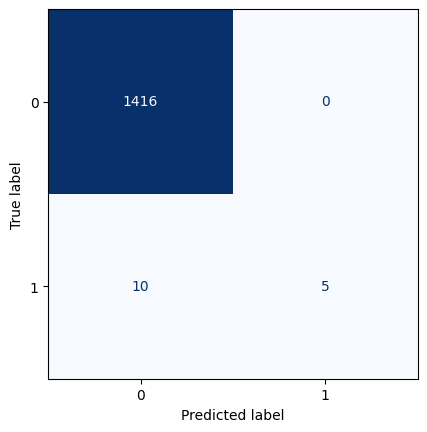

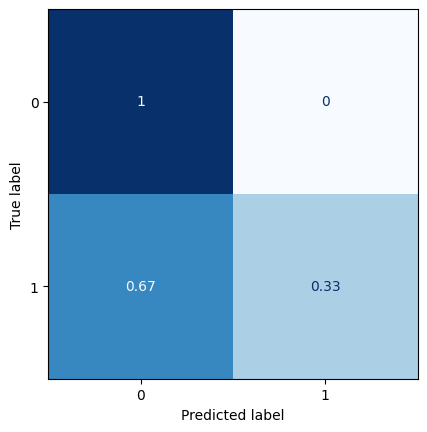

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
#data1 = pd.read_csv(path4)
ConfusionMatrixDisplay(confusion_matrix(y_test, np.rint(model.predict(test_img_std)))).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test, np.rint(model.predict(test_img_std)), normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


# CNN with SMOTE

In [163]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import * 

dataset = np.reshape(train_img_std, (11323,-1 ))

print('Before Smote')

dff = y_train
M = y_train.to_numpy()
# summarize dataset
classes = unique(M)
print(classes)
total = len(M)
for c in classes:
    n_examples = len(M[M==c])
    percent = n_examples / total * 100
    print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

smt = SMOTE()

train_img_std_sm, y_train_sm = smt.fit_resample(dataset, y_train)

print('After SMOTE')
dff = y_train_sm
M = y_train_sm.to_numpy()
# summarize dataset
classes = unique(M)
print(classes)
total = len(M)
for c in classes:
    n_examples = len(M[M==c])
    percent = n_examples / total * 100
    print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

Before Smote
[0. 1.]
> Class=0 : 11243/11323 (99.3%)
> Class=1 : 80/11323 (0.7%)
After SMOTE
[0. 1.]
> Class=0 : 11243/22486 (50.0%)
> Class=1 : 11243/22486 (50.0%)


In [164]:
train_img_std_sm = train_img_std_sm.reshape(22486,13, 29, 8)

In [173]:
### same basic CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(13, 29, 8)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))

model.add(Dense(1,activation='sigmoid')) # Output

model.compile(loss='binary_crossentropy', optimizer='adam')


monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
        verbose=1, mode='auto', restore_best_weights=True)

model.fit(train_img_std_sm, y_train_sm, validation_data=(val_img_std,y_val),
        callbacks=[monitor],epochs=10)


Epoch 1/10


2022-11-28 14:03:32.669792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


703/703 [==============================] - ETA: 0s - loss: 0.0818

2022-11-28 14:03:37.505966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


703/703 [==============================] - 5s 7ms/step - loss: 0.0818 - val_loss: 0.0253
Epoch 2/10
703/703 [==============================] - 4s 6ms/step - loss: 0.0253 - val_loss: 0.0388
Epoch 3/10
703/703 [==============================] - 4s 6ms/step - loss: 0.0144 - val_loss: 0.0253
Epoch 4/10
703/703 [==============================] - 4s 5ms/step - loss: 0.0088 - val_loss: 0.0202
Epoch 5/10
703/703 [==============================] - 4s 5ms/step - loss: 0.0072 - val_loss: 0.0244
Epoch 6/10
703/703 [==============================] - 4s 5ms/step - loss: 0.0060 - val_loss: 0.0309
Epoch 7/10
703/703 [==============================] - 4s 5ms/step - loss: 0.0028 - val_loss: 0.0292
Epoch 8/10
703/703 [==============================] - 4s 5ms/step - loss: 0.0013 - val_loss: 0.0482
Epoch 9/10
703/703 [==============================] - 4s 6ms/step - loss: 0.0012 - val_loss: 0.0380
Epoch 9: early stopping


45/45 [==============================] - 0s 2ms/step


2022-11-28 14:04:38.906090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 0s 2ms/step


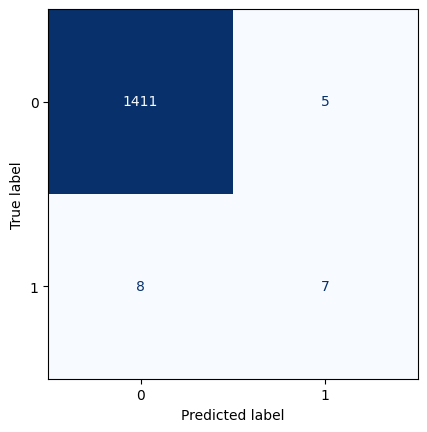

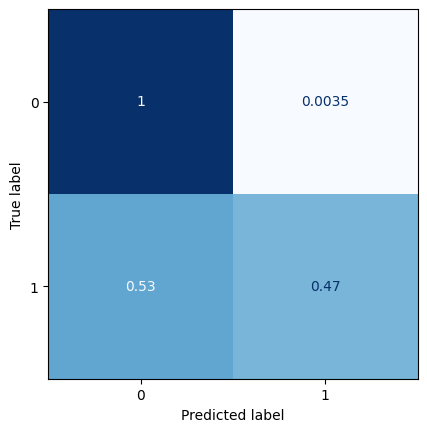

In [174]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
#data1 = pd.read_csv(path4)
ConfusionMatrixDisplay(confusion_matrix(y_test, np.rint(model.predict(test_img_std)))).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test, np.rint(model.predict(test_img_std)), normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


# sample weighting

In [17]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight

##n_samples / (n_classes * np.bincount(y))
sample_weights = compute_sample_weight(class_weight = 'balanced', 
                                                  y = y_train)

In [18]:
np.unique(sample_weights, return_counts=True)

(array([ 0.50355777, 70.76875   ]), array([11243,    80]))

In [19]:
### same basic CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(13, 29, 8)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))

model.add(Dense(1,activation='sigmoid')) # Output

model.compile(loss='binary_crossentropy', optimizer='adam')


monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, 
        verbose=1, mode='auto', restore_best_weights=True)

model.fit(train_img_std, y_train, sample_weight=sample_weights, validation_data=(val_img_std,y_val),
        callbacks=[monitor],epochs=50)


Epoch 1/50


2022-11-29 21:50:18.490943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.3951

2022-11-29 21:50:26.268057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 10s 13ms/step - loss: 0.3951 - val_loss: 0.1061
Epoch 2/50
354/354 [==============================] - 2s 6ms/step - loss: 0.1887 - val_loss: 0.2964
Epoch 3/50
354/354 [==============================] - 2s 6ms/step - loss: 0.1205 - val_loss: 0.1231
Epoch 4/50
354/354 [==============================] - 2s 6ms/step - loss: 0.1249 - val_loss: 0.1332
Epoch 5/50
354/354 [==============================] - 2s 6ms/step - loss: 0.0942 - val_loss: 0.0835
Epoch 6/50
354/354 [==============================] - 2s 7ms/step - loss: 0.0949 - val_loss: 0.0826
Epoch 7/50
354/354 [==============================] - 2s 6ms/step - loss: 0.0759 - val_loss: 0.1290
Epoch 8/50
354/354 [==============================] - 2s 6ms/step - loss: 0.0695 - val_loss: 0.0583
Epoch 9/50
354/354 [==============================] - 2s 6ms/step - loss: 0.0571 - val_loss: 0.1344
Epoch 10/50
354/354 [==============================] - 2s 6ms/step - loss: 0.0530 - val_loss: 0.0669
Epoch 11

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 11, 27, 8)         584       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 13, 8)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 11, 16)         1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 80)                0         
                                                                 
 dense_5 (Dense)             (None, 16)               

2022-11-29 21:52:55.381315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 0s 2ms/step


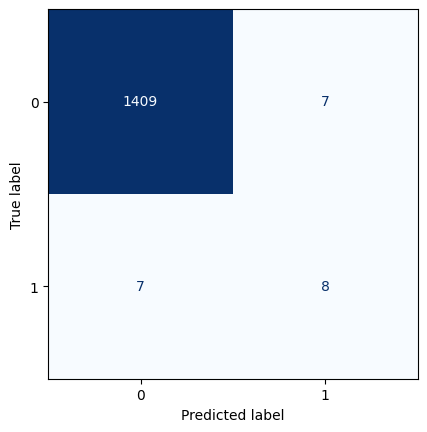

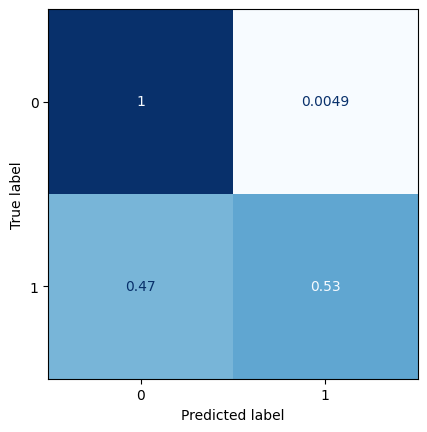

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
#data1 = pd.read_csv(path4)
ConfusionMatrixDisplay(confusion_matrix(y_test, np.rint(model.predict(test_img_std)))).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test, np.rint(model.predict(test_img_std)), normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


# Sample weighting, more complex models

## More layers

In [10]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight

##n_samples / (n_classes * np.bincount(y))
sample_weights = compute_sample_weight(class_weight = 'balanced', 
                                                  y = y_train)

In [11]:
np.unique(sample_weights, return_counts=True)

(array([ 0.50355777, 70.76875   ]), array([11243,    80]))

In [12]:
sample_weights.shape

(11323,)

In [24]:
### more complex CNN: LeNet-5 CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

CNN = Sequential(name="Sequential_CNN")

CNN.add(Conv2D(16, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu", input_shape=(13, 29, 8)))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))


CNN.add(Conv2D(32, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu"))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

CNN.add(Flatten())

CNN.add(Dense(64, activation='relu'))
CNN.add(Dense(32, activation='relu'))
CNN.add(Dense(1, activation='sigmoid'))

CNN.summary()

CNN.compile(loss='binary_crossentropy', optimizer='adam')


monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, 
        verbose=1, mode='auto', restore_best_weights=True)

CNN.fit(train_img_std, y_train, sample_weight=sample_weights, validation_data=(val_img_std,y_val),
        callbacks=[monitor],epochs=50)


Model: "Sequential_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 7, 15, 16)         1168      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 2, 4, 32)          4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 1, 2, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)             

2022-11-29 22:10:15.965842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.3764

2022-11-29 22:10:27.903098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 15s 14ms/step - loss: 0.3764 - val_loss: 0.1942
Epoch 2/50
354/354 [==============================] - 3s 7ms/step - loss: 0.1961 - val_loss: 0.1248
Epoch 3/50
354/354 [==============================] - 2s 6ms/step - loss: 0.1905 - val_loss: 0.2626
Epoch 4/50
354/354 [==============================] - 2s 6ms/step - loss: 0.1160 - val_loss: 0.1304
Epoch 5/50
354/354 [==============================] - 2s 6ms/step - loss: 0.0999 - val_loss: 0.0697
Epoch 6/50
354/354 [==============================] - 2s 6ms/step - loss: 0.1098 - val_loss: 0.2155
Epoch 7/50
354/354 [==============================] - 2s 6ms/step - loss: 0.0797 - val_loss: 0.1090
Epoch 8/50
354/354 [==============================] - 2s 6ms/step - loss: 0.0618 - val_loss: 0.1616
Epoch 9/50
354/354 [==============================] - 2s 6ms/step - loss: 0.0785 - val_loss: 0.0621
Epoch 10/50
354/354 [==============================] - 2s 6ms/step - loss: 0.0886 - val_loss: 0.0994
Epoch 11

2022-11-29 22:12:11.553376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 0s 3ms/step


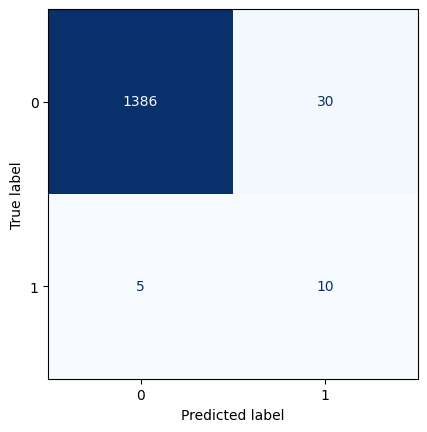

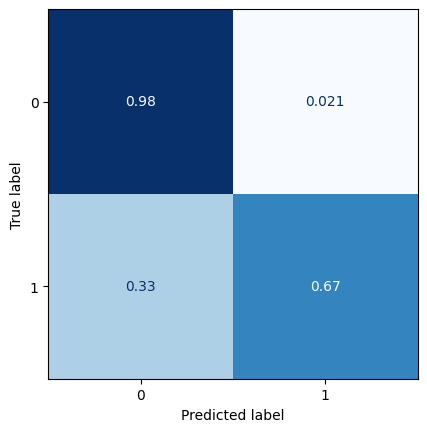

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
#data1 = pd.read_csv(path4)
ConfusionMatrixDisplay(confusion_matrix(y_test, np.rint(CNN.predict(test_img_std)))).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test, np.rint(CNN.predict(test_img_std)), normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn import metrics
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

45/45 [==============================] - 0s 2ms/step


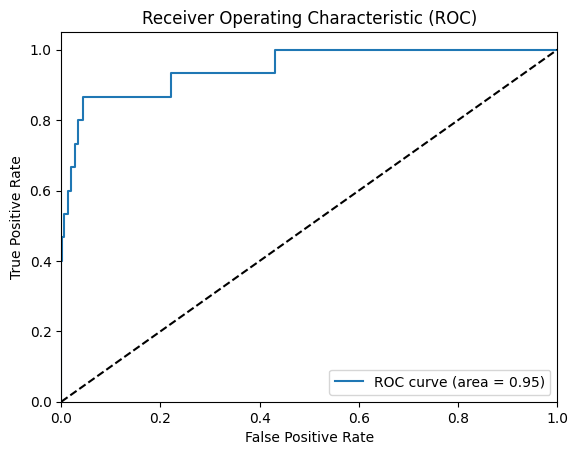

In [29]:
plot_roc(CNN.predict(test_img_std),y_test)

## Larger kernel

In [21]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight

##n_samples / (n_classes * np.bincount(y))
sample_weights = compute_sample_weight(class_weight = 'balanced', 
                                                  y = y_train)

### more complex CNN: LeNet-5 CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

CNN = Sequential(name="Sequential_CNN")

CNN.add(Conv2D(16, kernel_size=(5, 5),
               strides=(2, 2), padding="same",
               activation="relu", input_shape=(13, 29, 8)))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2),
                     padding="valid"))


CNN.add(Conv2D(32, kernel_size=(5, 5),
               strides=(2, 2), padding="same",
               activation="relu"))

CNN.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2),
                     padding="valid"))

CNN.add(Flatten())

CNN.add(Dense(64, activation='relu'))
CNN.add(Dense(32, activation='relu'))
CNN.add(Dense(1, activation='sigmoid'))

CNN.summary()

CNN.compile(loss='binary_crossentropy', optimizer='adam')


monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=10, 
        verbose=1, mode='auto', restore_best_weights=True)



Model: "Sequential_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 7, 15, 16)         3216      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 6, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 7, 32)          12832     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 1, 3, 32)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 96)                0         
                                                                 
 dense_10 (Dense)            (None, 64)             

In [22]:
CNN.fit(train_img_std, y_train, sample_weight=sample_weights, validation_data=(val_img_std,y_val),
        callbacks=[monitor],epochs=50)


Epoch 1/50


2023-01-17 10:05:11.765492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - ETA: 0s - loss: 0.4395

2023-01-17 10:05:18.885143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


354/354 [==============================] - 9s 8ms/step - loss: 0.4395 - val_loss: 0.2640
Epoch 2/50
354/354 [==============================] - 2s 7ms/step - loss: 0.2886 - val_loss: 0.0910
Epoch 3/50
354/354 [==============================] - 2s 7ms/step - loss: 0.1613 - val_loss: 0.0892
Epoch 4/50
354/354 [==============================] - 2s 7ms/step - loss: 0.1195 - val_loss: 0.0982
Epoch 5/50
354/354 [==============================] - 2s 7ms/step - loss: 0.2181 - val_loss: 0.2771
Epoch 6/50
354/354 [==============================] - 2s 6ms/step - loss: 0.2230 - val_loss: 0.1840
Epoch 7/50
354/354 [==============================] - 2s 6ms/step - loss: 0.1118 - val_loss: 0.1463
Epoch 8/50
354/354 [==============================] - 2s 6ms/step - loss: 0.1537 - val_loss: 0.1139
Epoch 9/50
354/354 [==============================] - 2s 6ms/step - loss: 0.1467 - val_loss: 0.3363
Epoch 10/50
354/354 [==============================] - 2s 6ms/step - loss: 0.0926 - val_loss: 0.0790
Epoch 11/5

2023-01-17 10:06:17.108263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 0s 2ms/step


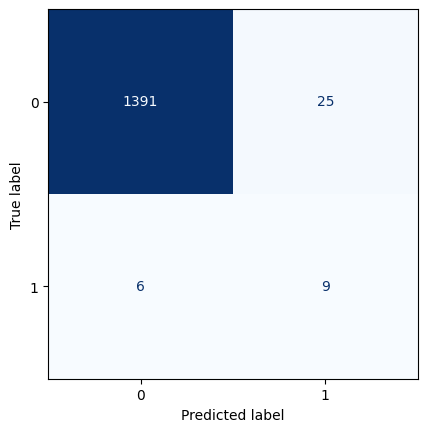

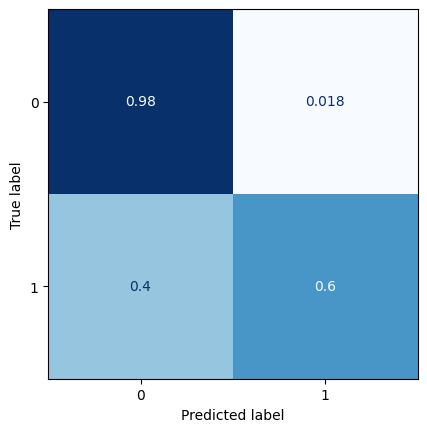

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
#data1 = pd.read_csv(path4)
ConfusionMatrixDisplay(confusion_matrix(y_test, np.rint(CNN.predict(test_img_std)))).plot(colorbar=False,cmap=plt.cm.Blues, values_format='d')
ConfusionMatrixDisplay(confusion_matrix(y_test, np.rint(CNN.predict(test_img_std)), normalize='true')).plot(colorbar=False,cmap=plt.cm.Blues)


In [23]:
(4)/2

2.0

In [22]:
(4/3)/2

0.6666666666666666

In [1]:
from sklearn.utils.class_weight import compute_sample_weight